In [2]:
import random
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from easse import fkgl, quality_estimation # samsa fails dep: tupa


In [19]:
RANDOM_SEED = 42

names = {
        'length_ratio': 'Compression ratio',
        'levenshtein': 'Levenshtein similarity',    
        'lex_complexity': 'WordRank ratio',
        'dep_tree_depth': 'Dependency tree depth ratio',
    }

# lang = 'de' # en
lang = 'en'

data_path = Path(f'/srv/scratch6/kew/ats/data/{lang}/data_stats')
plots_path = Path('/home/user/kew/INSTALLS/fudge/analysis/plots')


In [20]:
def make_row_plots(df, level, dataset_name, grid_x=names, outpath=None, llim=0.0, rlim=1.25):

    sns.set_context('paper')

    fig, axes = plt.subplots(1, len(grid_x), figsize=(len(grid_x)*4, 4), sharey=False)

    lines, labels = [], []
    if level == 'all':
        for i, k in enumerate(list(grid_x.keys())):
            sns.histplot(
                df, x=k, ax=axes[i], hue='level', 
                binwidth=0.05, stat='density', kde=True, 
                linewidth=0.1, alpha=0.7, shrink=1.0, 
                legend=True if i == len(grid_x)-1 else False
            )
            axes[i].set_xlim(left=llim, right=rlim)
            axes[i].set_xticks(np.arange(llim, rlim+0.05, 0.25))
            axes[i].set_xlabel(grid_x[k])
        
        title = f'{dataset_name} - all levels'
        fig.suptitle(title)    
    else:
        df = df[df['level'] == level]
        for i, k in enumerate(grid_x.keys()):
            sns.histplot(df, x=k, ax=axes[i], bins=20, binwidth=0.05, stat='density', linewidth=0.1, alpha=0.7, shrink=1.0)
            axes[i].set_xlim(left=llim, right=rlim)
            axes[i].set_xticks(np.arange(llim, rlim+0.05, 0.25))
            axes[i].set_xlabel(grid_x[k])
        title = f'{dataset_name} level {level}'
        fig.suptitle(title)
    
    fig.set_tight_layout(True)

    if outpath:
        outfile = outpath / f'{dataset_name.lower()}_level_{level}.png'
        plt.savefig(outfile, dpi=300)
        print(f'saved plot to {outfile}')

    return

def make_facet_grid(df, title, dataset_name, grid_x=names, outpath=None, llim=0.0, rlim=1.25):
    """Reproduces a facet grid for all newsela levels, similar to https://aclanthology.org/2020.lrec-1.577"""

    sns.set_context('paper')
    n_bins = 50
    
    grid_x = names
    grid_y = sorted(df['level'].unique())
    
    fig, axes = plt.subplots(len(grid_y), len(grid_x), figsize=(len(grid_x)*3, len(grid_y)*3), sharey=True, sharex=True, tight_layout=False)

    for i, level in enumerate(grid_y):
        for j, k in enumerate(grid_x.keys()):
            sub_df = df[df['level'] == level]
            sns.histplot(sub_df, x=k, ax=axes[i][j], binwidth=0.05, stat='density', linewidth=0.1, alpha=0.7, legend=False)  
            axes[i][j].set_xlim(left=llim, right=rlim)
            axes[i][j].set_xlabel(grid_x[k])
            axes[i][j].set_xticks(np.arange(llim, rlim+0.05, 0.25))
            if j == 0:
                axes[i][j].set_ylabel(f'{level}')
            else:
                axes[i][j].set_ylabel(None)

    if title:
        fig.suptitle(title)
    
    # shared axis labels
    fig.supxlabel('Attributes')
    fig.supylabel(f'{dataset_name} Simplification Levels')
    
    if outpath:
        outfile = outpath / f'{dataset_name.lower()}_level_attributes_facet.png'
        plt.savefig(outfile, dpi=300)
        print(f'saved plot to {outfile}')

    return


In [21]:
dfs = []

if lang == 'en':
    for file in data_path.glob('newsela_manual*'):
        df = pd.read_csv(file, sep='\t')
        df['level'] = f'Simp-{file.stem[-1]}'
        dfs.append(df)
elif lang == 'de':
    for file in data_path.glob('apa_capito*'):
        df = pd.read_csv(file, sep='\t')
        df['level'] = f'Simp-{file.stem.split("_")[-1]}'
        dfs.append(df)

df = pd.concat(dfs).reset_index(drop=True)
# df.head()

# downsample dataframe for equal number of sentences in each level - better plots
min_level_count = min(df['level'].value_counts())
print(len(df))
df = df.groupby(['level']).sample(n=min_level_count, random_state=RANDOM_SEED, replace=False)
print(len(df))
print(df['level'].value_counts())

print('**** length_ratio')
print(df.groupby('level')['length_ratio'].describe())
print('**** lex_complexity')
print(df.groupby('level')['lex_complexity'].describe())
print('**** levenshtein')
print(df.groupby('level')['levenshtein'].describe())
print('**** dep_tree_depth')
print(df.groupby('level')['dep_tree_depth'].describe())
print('**** Sentence splits')
print(df.groupby('level')['Sentence splits'].describe())

5033
3712
Simp-1    928
Simp-2    928
Simp-3    928
Simp-4    928
Name: level, dtype: int64
**** length_ratio
        count      mean       std       min       25%       50%       75%  \
level                                                                       
Simp-1  928.0  1.055122  0.472343  0.276923  0.984276  1.000000  1.028227   
Simp-2  928.0  1.022534  0.382983  0.260870  0.884550  1.000000  1.062748   
Simp-3  928.0  0.942216  0.468215  0.095652  0.704099  0.922187  1.035714   
Simp-4  928.0  0.877890  0.544315  0.100000  0.559000  0.834660  1.021943   

              max  
level              
Simp-1  10.454545  
Simp-2   5.666667  
Simp-3   7.818182  
Simp-4   7.909091  
**** lex_complexity
        count      mean       std       min       25%       50%       75%  \
level                                                                       
Simp-1  928.0  0.991265  0.053202  0.697672  0.988626  1.000000  1.000000   
Simp-2  928.0  0.985747  0.074565  0.427344  0.960439  1

plotted en 1
saved plot to /home/user/kew/INSTALLS/fudge/analysis/plots/newsela_level_1.png
plotted en 2
saved plot to /home/user/kew/INSTALLS/fudge/analysis/plots/newsela_level_2.png
plotted en 3
saved plot to /home/user/kew/INSTALLS/fudge/analysis/plots/newsela_level_3.png
plotted en 4
saved plot to /home/user/kew/INSTALLS/fudge/analysis/plots/newsela_level_4.png
plotted en all
saved plot to /home/user/kew/INSTALLS/fudge/analysis/plots/newsela_level_all.png
saved plot to /home/user/kew/INSTALLS/fudge/analysis/plots/newsela_level_attributes_facet.png


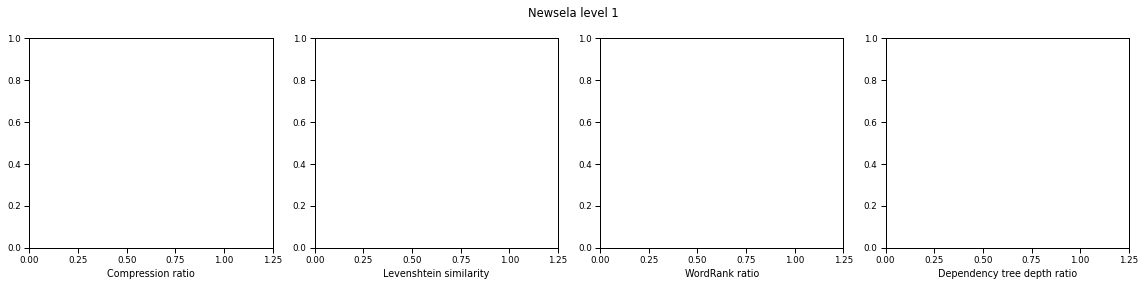

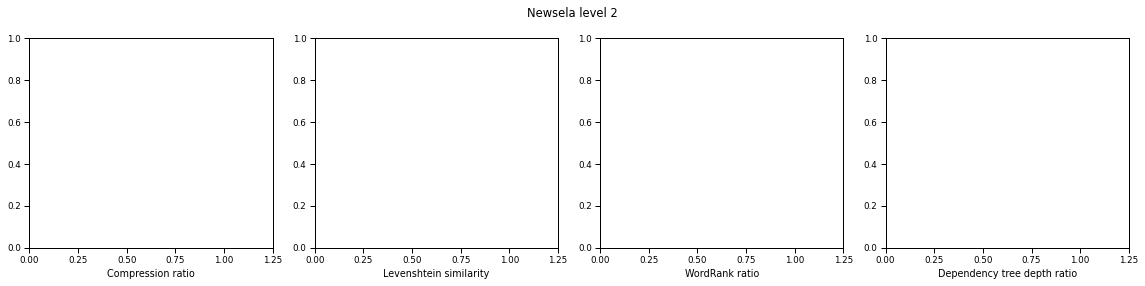

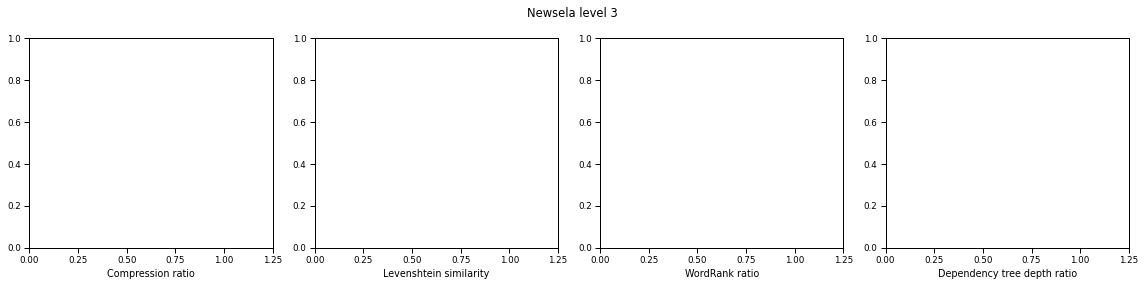

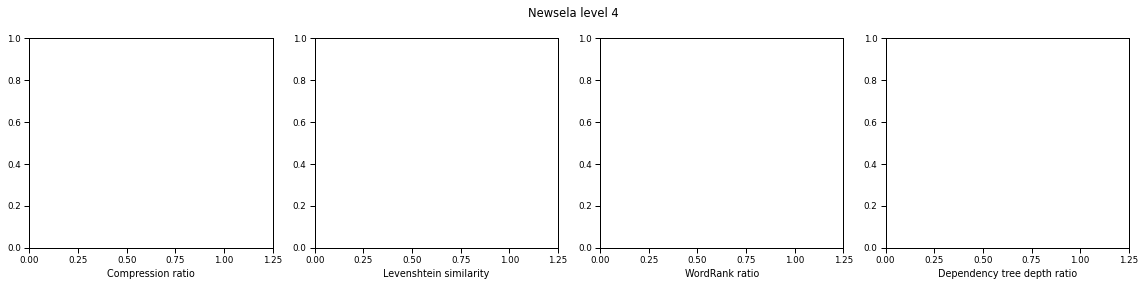

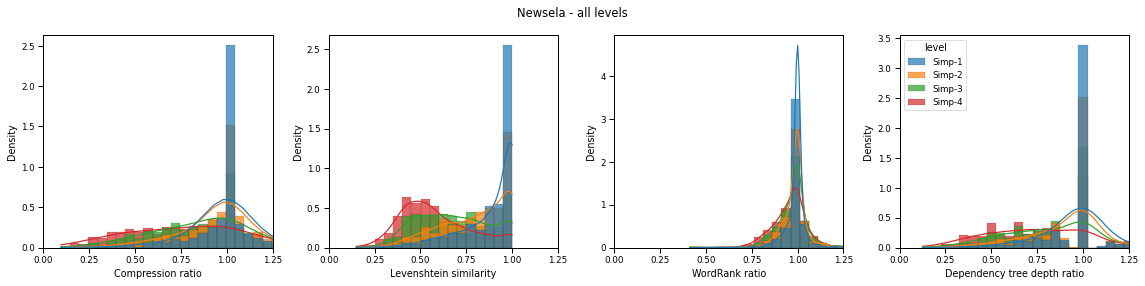

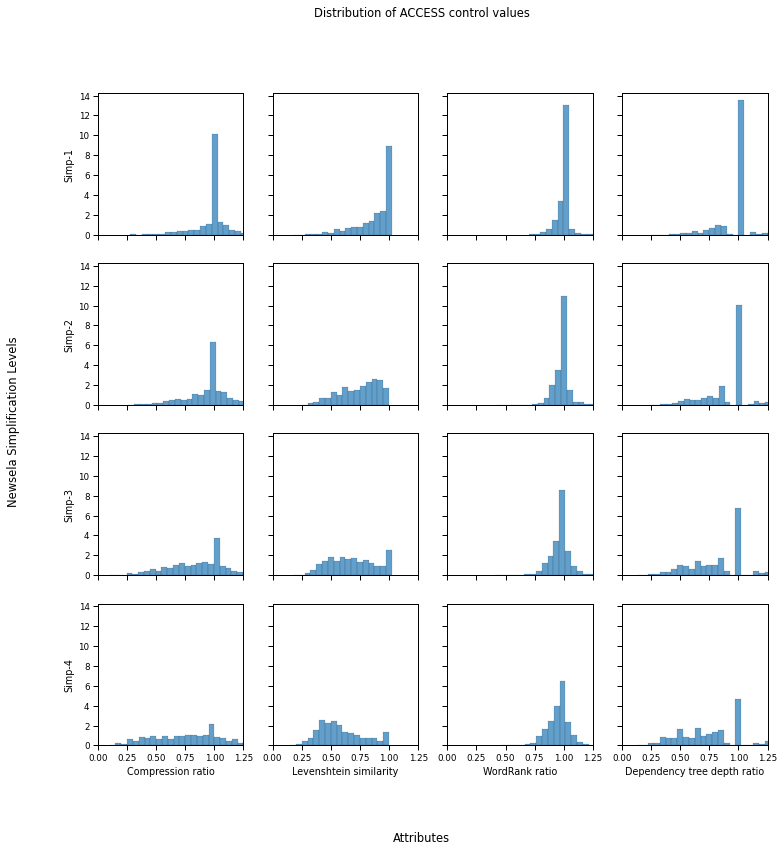

In [17]:

if lang == 'en':
    for level in ['1', '2', '3', '4', 'all']:
        print(f'plotted {lang} {level}')
        make_row_plots(df, level=level, dataset_name='Newsela', grid_x=names, outpath=plots_path)
    make_facet_grid(df, title='Distribution of ACCESS control values', dataset_name='Newsela', grid_x=names, outpath=plots_path)

elif lang == 'de':
    for level in ['a1', 'a2', 'b1', 'all']:
        print(f'plotted {lang} {level}')
        make_row_plots(df, level=level, dataset_name='APA-Capito', grid_x=names, outpath=plots_path)
    make_facet_grid(df, title='Distribution of ACCESS control values', dataset_name='APA-Capito', grid_x=names, outpath=plots_path)


{'Simp-1': {'fkgl': 7.967424772673326, 'Compression ratio': 1.0088417673071652, 'Sentence splits': 1.1946118721461185, 'Levenshtein similarity': 0.9038902274159766, 'Exact copies': 0.4410958904109589, 'Additions proportion': 0.09501851581521988, 'Deletions proportion': 0.0990403784826063, 'Lexical complexity score': 8.55938268290073}, 'Simp-2': {'fkgl': 6.411884361286063, 'Compression ratio': 0.9812542863921209, 'Sentence splits': 1.4155807365439093, 'Levenshtein similarity': 0.8199736978615051, 'Exact copies': 0.22946175637393768, 'Additions proportion': 0.17032500978943574, 'Deletions proportion': 0.1987557520780373, 'Lexical complexity score': 8.517484017433077}, 'Simp-3': {'fkgl': 4.9119896238676795, 'Compression ratio': 0.9246498121085542, 'Sentence splits': 1.5486515641855447, 'Levenshtein similarity': 0.7346835852500192, 'Exact copies': 0.13268608414239483, 'Additions proportion': 0.24369044331926637, 'Deletions proportion': 0.3137163907153821, 'Lexical complexity score': 8.4674

<AxesSubplot:>

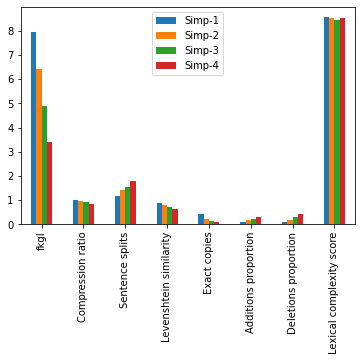

In [4]:
# qe metrics

def read_split_lines(filename, split_sep='\t'):
    """from easse/utils/helpers.py"""
    with open(filename, encoding="utf-8") as f:
        split_instances = []
        for line in f:
            split_instances.append([split.strip() for split in line.split(split_sep)])

#     print(split_instances[:3])
    return split_instances

d = {}
for level in [1, 2, 3, 4]:
    src_sents, ref_sents = [], []
    d.update({f'Simp-{level}': {}})
#     for split in ['train', 'test', 'dev']:
    for split in ['test']:
        split_lines = read_split_lines(f'/srv/scratch6/kew/ats/data/en/aligned/newsela_manual_v0_v{level}_{split}.tsv')
        src_sents += [i[0] for i in split_lines]
        ref_sents += [i[1] for i in split_lines]
    d[f'Simp-{level}']['fkgl'] = fkgl.corpus_fkgl(ref_sents)
    d[f'Simp-{level}'].update(quality_estimation.corpus_quality_estimation(src_sents, ref_sents))

# print(d)
gdf = pd.DataFrame(d)
gdf

print(d)
# gdf.drop(index=['Lexical complexity score'], inplace=True)
gdf.plot(kind='bar')
